In [1]:
import pandas as pd
dmf = pd.read_csv("../output/features/real_event_logs.csv", index_col=None)
#dmf = dmf.drop(['Unnamed: 0'], axis=1)
print(dmf.shape)
dmf.head()
# Include complexity features

(23, 102)


,log,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting,n_traces,...,entropy_k_block_diff_1,entropy_k_block_diff_3,entropy_k_block_diff_5,entropy_k_block_ratio_1,entropy_k_block_ratio_3,entropy_k_block_ratio_5,entropy_knn_3,entropy_knn_5,entropy_knn_7,Log Nature
0,BPIC15_2,2.405122e+05,0.627973,2.858769e+05,0.602371,1.505466e+05,0.317217,1.853129e+05,0.390473,832,...,7.105,7.105,7.105,7.105,7.105,7.105,5.545,5.039,4.721,Real
1,BPI_Challenge_2018,1.156384e+07,0.712079,2.114626e+07,0.570688,1.414023e+07,0.381612,1.557608e+07,0.420362,43809,...,-0.010,1.855,0.511,1.403,3.572,2.001,7.849,7.371,7.067,Real
2,Receipt_WABO_CoSeLoG,2.382326e+03,0.689363,1.829627e+04,0.235532,7.814868e+03,0.100603,1.072870e+04,0.138113,1434,...,2.672,2.966,0.804,1.484,2.966,2.966,3.260,2.845,2.584,Real
3,BPIC15_3,2.981464e+05,0.661781,3.975043e+05,0.605676,2.241393e+05,0.341521,2.657571e+05,0.404934,1409,...,-0.007,6.780,6.780,6.780,6.780,6.780,5.701,5.212,4.900,Real
4,BPI_Challenge_2019,1.690369e+06,0.645530,7.477256e+06,0.328029,7.298458e+06,0.320185,7.300663e+06,0.320282,251734,...,-0.041,1.530,0.840,0.620,3.244,1.913,7.333,6.882,6.601,Real


In [2]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

scaled_dmf = scaleColumns(dmf, dmf.drop(['log', 'Log Nature'], axis=1).columns)
stats = scaled_dmf.describe().transpose()

#print(stats.index)
stats.head()

,count,mean,std,min,25%,50%,75%,max
variant_entropy,23.0,0.072162,0.209197,0.0,0.000385,0.015079,0.025995,1.0
normalized_variant_entropy,23.0,0.579834,0.205284,0.0,0.457637,0.604760,0.686986,1.0
sequence_entropy,23.0,0.088289,0.222556,0.0,0.006431,0.013057,0.028613,1.0
normalized_sequence_entropy,23.0,0.620993,0.343005,0.0,0.413454,0.629387,0.970122,1.0
sequence_entropy_linear_forgetting,23.0,0.088578,0.230392,0.0,0.005289,0.010100,0.023332,1.0


53

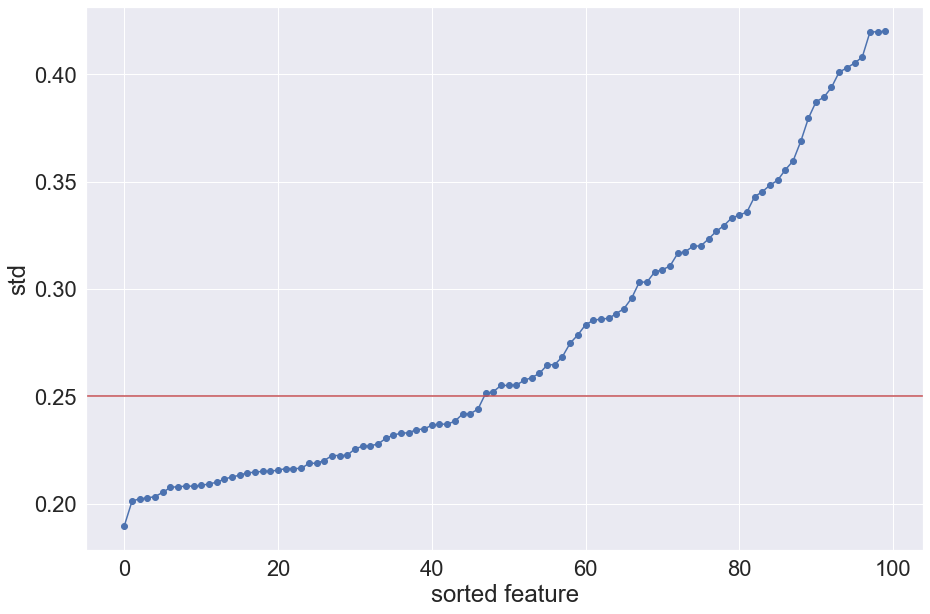

In [102]:
THRESHOLD= 0.25
sorted_features['var'] = stats.apply(lambda x: x['std']**2, axis=1)
sorted_features = sorted_features.sort_values("var", ascending=True)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel("sorted feature")
plt.ylabel("std")
#plt.xticks(sorted_features.index)

plt.plot(range(len(sorted_features)), sorted_features['std'], marker='o')
plt.axhline(y=0.25, color='r', linestyle='-')

filtered_feat = sorted_features[sorted_features['std']>=THRESHOLD].index
len(filtered_feat)

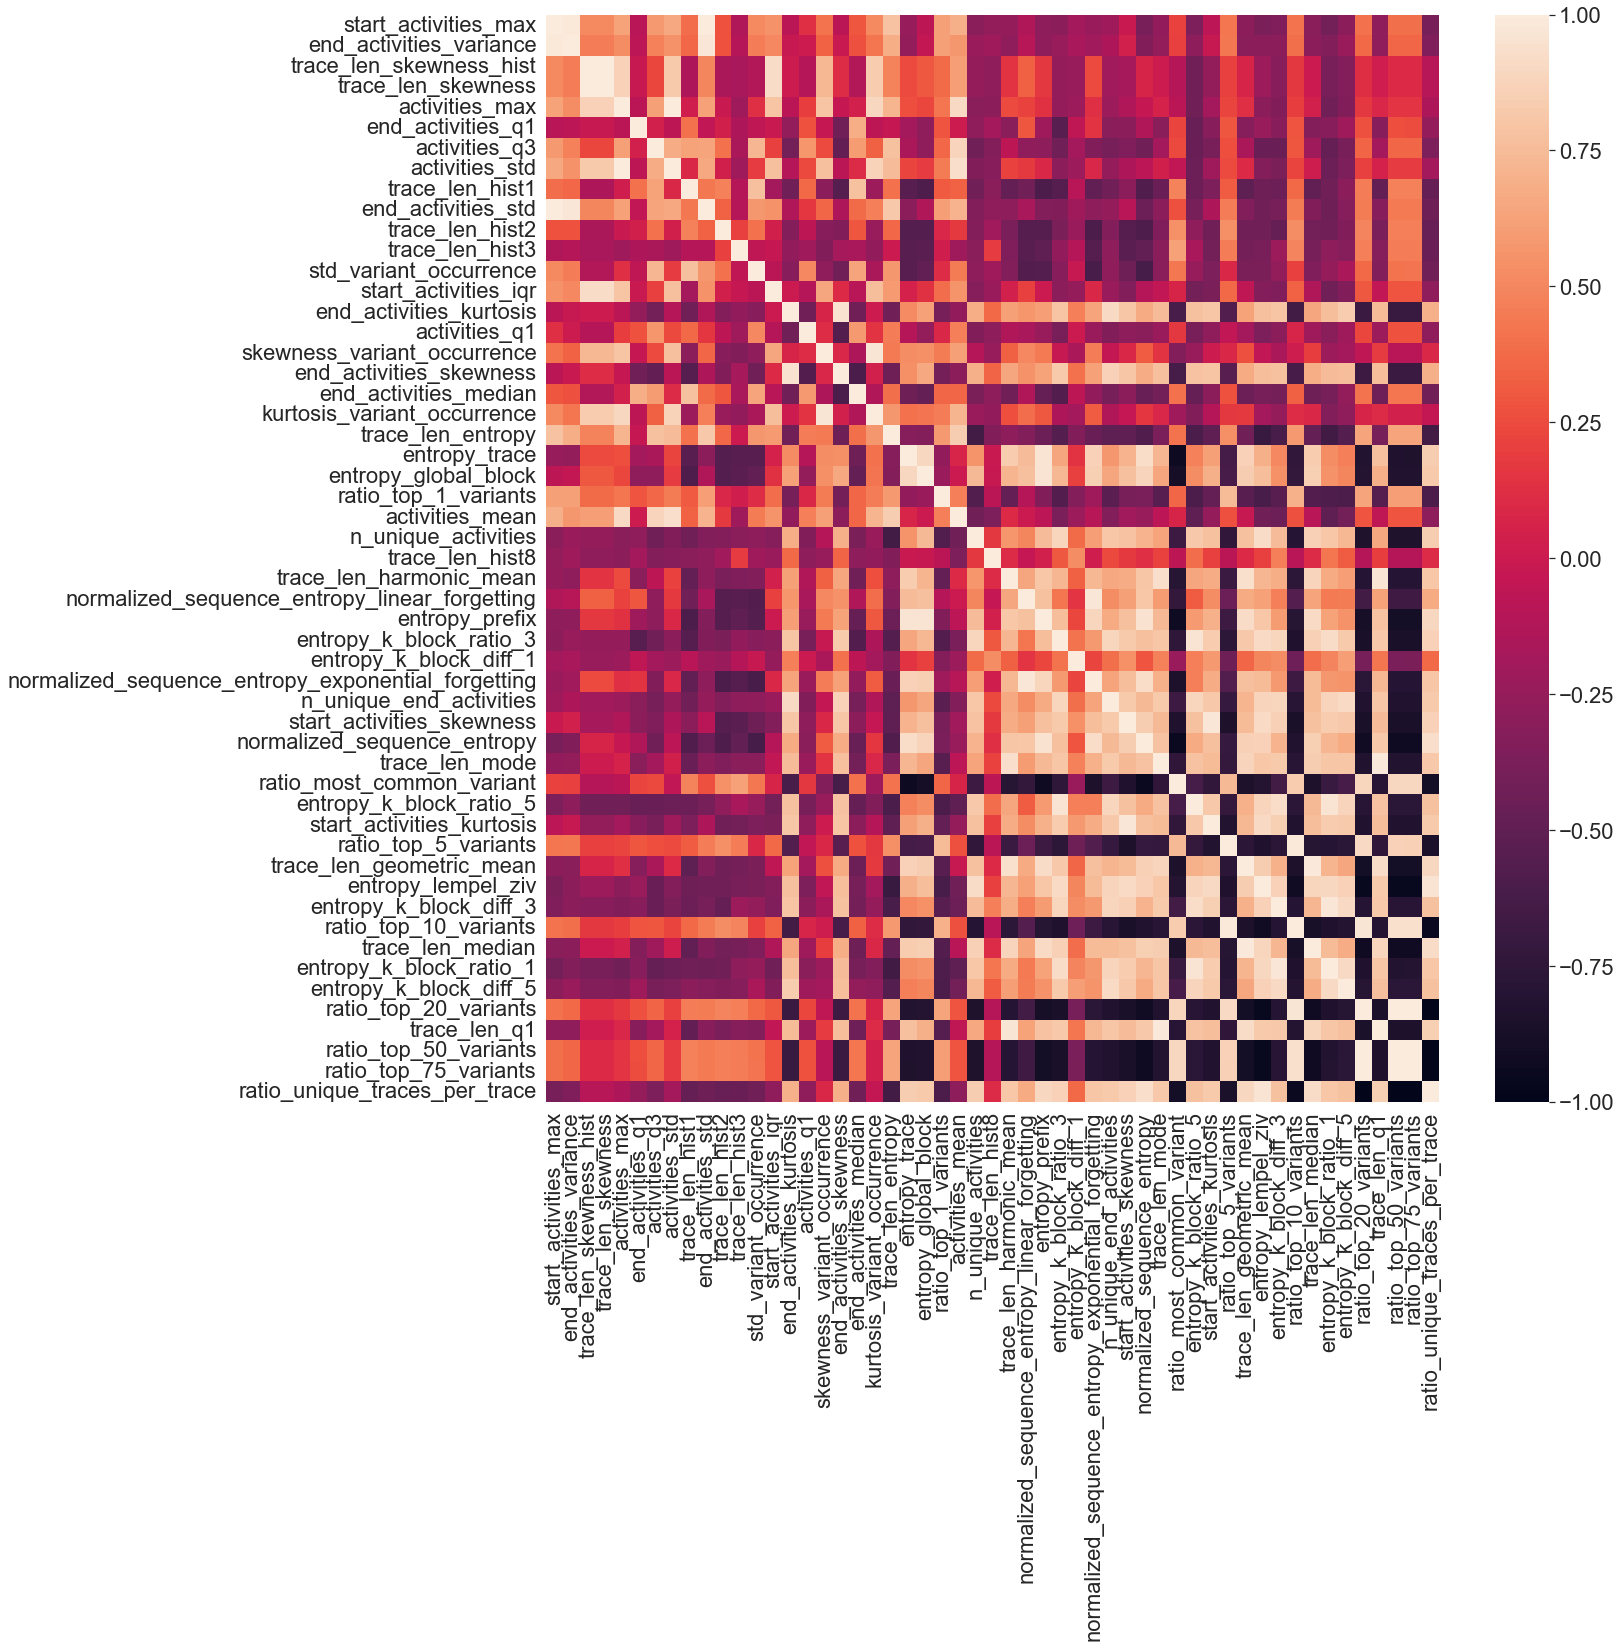

,start_activities_max,end_activities_variance,trace_len_skewness_hist,trace_len_skewness,activities_max,end_activities_q1,activities_q3,activities_std,trace_len_hist1,end_activities_std,...,entropy_k_block_diff_3,ratio_top_10_variants,trace_len_median,entropy_k_block_ratio_1,entropy_k_block_diff_5,ratio_top_20_variants,trace_len_q1,ratio_top_50_variants,ratio_top_75_variants,ratio_unique_traces_per_trace
start_activities_max,1.000000,0.983424,0.510680,0.510680,0.628179,-0.090011,0.582388,0.654280,0.384826,0.992254,...,-0.353923,0.409484,-0.309794,-0.410932,-0.294408,0.405747,-0.280090,0.394243,0.394256,-0.393977
end_activities_variance,0.983424,1.000000,0.458959,0.458959,0.525272,-0.071941,0.473409,0.548543,0.363145,0.973173,...,-0.289558,0.397381,-0.300372,-0.342097,-0.234241,0.370588,-0.276479,0.352681,0.352185,-0.351606
trace_len_skewness_hist,0.510680,0.458959,1.000000,1.000000,0.860331,-0.020142,0.231172,0.827151,-0.142547,0.492269,...,-0.319538,0.166790,-0.004567,-0.385021,-0.328756,0.121233,0.019730,0.101141,0.100460,-0.099458
trace_len_skewness,0.510680,0.458959,1.000000,1.000000,0.860331,-0.020142,0.231172,0.827151,-0.142547,0.492269,...,-0.319538,0.166790,-0.004567,-0.385021,-0.328756,0.121233,0.019730,0.101141,0.100460,-0.099458
activities_max,0.628179,0.525272,0.860331,0.860331,1.000000,-0.083272,0.612303,0.996429,0.029984,0.617851,...,-0.348155,0.190647,0.044931,-0.421804,-0.349853,0.164998,0.080486,0.149258,0.149243,-0.148344
end_activities_q1,-0.090011,-0.071941,-0.020142,-0.020142,-0.083272,1.000000,0.046639,-0.063032,0.401540,-0.047169,...,-0.318846,0.283839,-0.329279,-0.318022,-0.216124,0.271773,-0.319079,0.258102,0.257585,-0.257085
activities_q3,0.582388,0.473409,0.231172,0.231172,0.612303,0.046639,1.000000,0.672378,0.626451,0.633719,...,-0.459399,0.296510,-0.203190,-0.472406,-0.383402,0.350791,-0.186218,0.357892,0.359259,-0.359788
activities_std,0.654280,0.548543,0.827151,0.827151,0.996429,-0.063032,0.672378,1.000000,0.092188,0.649804,...,-0.374559,0.219661,0.010179,-0.446197,-0.366750,0.198607,0.053483,0.183560,0.183629,-0.182776
trace_len_hist1,0.384826,0.363145,-0.142547,-0.142547,0.029984,0.401540,0.626451,0.092188,1.000000,0.436749,...,-0.447970,0.374526,-0.497937,-0.419779,-0.299042,0.456175,-0.486918,0.471813,0.473146,-0.474428
end_activities_std,0.992254,0.973173,0.492269,0.492269,0.617851,-0.047169,0.633719,0.649804,0.436749,1.000000,...,-0.392985,0.446302,-0.348237,-0.442602,-0.324465,0.449856,-0.313528,0.440095,0.440227,-0.440039


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns



selected_per_category_highest_variance = ['ratio_unique_traces_per_trace', # simple_statistics
                                         'trace_len_hist8',# trace_length
                                         'skewness_variant_occurrence',# trace_variant
                                         'activities_mean',# activities
                                         'start_activities_kurtosis',# start_activities
                                         'end_activities_median',# end_activities
                                         'entropy_k_block_diff_1',# entropies
                                         'n_traces', 'n_unique_traces'
                                         ]
def plot_miner_correlation(input_df):
    #df = input_df.loc[:, input_df.columns.isin(selected_per_category_highest_variance)]
    df = input_df.loc[:,:]
    #df = input_df.loc[:, sorted_features]
    #df = input_df.loc[:, input_df.columns[3:]]

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.set(font_scale = 2)
    b= sns.heatmap(corr,
                ax=ax,
                vmin=-1,
                vmax=1,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    #b.set_yticklabels(b.get_yticks(), size = 15)
    plt.show()
    return corr

#scaled_dmf = scaled_dmf.drop(['log', 'Log Nature'], axis=1)
scaled_dmf = scaled_dmf[filtered_feat]
corr_df = plot_miner_correlation(scaled_dmf)
stats = stats.loc[filtered_feat]
corr_df

<AxesSubplot: xlabel='disconnection', ylabel='std'>

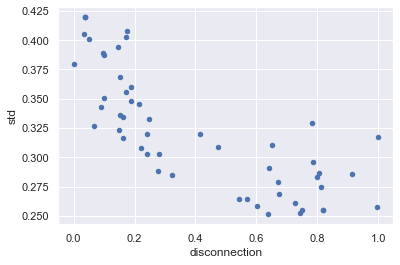

In [119]:
#feature_metrics= corr_df.loc[:,:]
feature_metrics = pd.DataFrame()
feature_metrics['disconnection'] = pd.Series(min_max_scaler.fit_transform((corr_df.abs()).sum(axis=1).to_numpy().reshape(-1, 1)).reshape(len(corr_df))).apply(lambda x: 1-x)   
#TODO: MinMaxScaler ONLY before std computation
#feature_metrics['std'] = pd.Series(min_max_scaler.fit_transform(stats['std'].to_numpy().reshape(-1, 1)).reshape(len(corr_df)))
feature_metrics['std'] = pd.Series(stats['std'].to_numpy().reshape(-1, 1).reshape(len(corr_df)))
#feature_metrics['score'] = feature_metrics.apply(lambda x: x['disconnection'], axis=1) #TODO mean or prod?
feature_metrics['score'] = feature_metrics.apply(lambda x: x.prod(), axis=1) #TODO mean or prod?
feature_metrics.index = corr_df.index
#pd.concat([feature_metrics, stats['std']], axis=1)
#feature_metrics = scaleColumns(feature_metrics, feature_metrics.columns)


feature_metrics.plot.scatter(x="disconnection", y="std")

#top_k_score = feature_metrics.sort_values(["score"], ascending=False).head(TOP_K).index[:5].tolist()
#other = ['variant_entropy', 'normalized_variant_entropy', 'sequence_entropy', 'normalized_sequence_entropy','sequence_entropy_linear_forgetting','normalized_sequence_entropy_linear_forgetting','sequence_entropy_exponential_forgetting','normalized_sequence_entropy_exponential_forgetting'] 
#selected_highest_score = top_k_score+other

0.9051285781090895


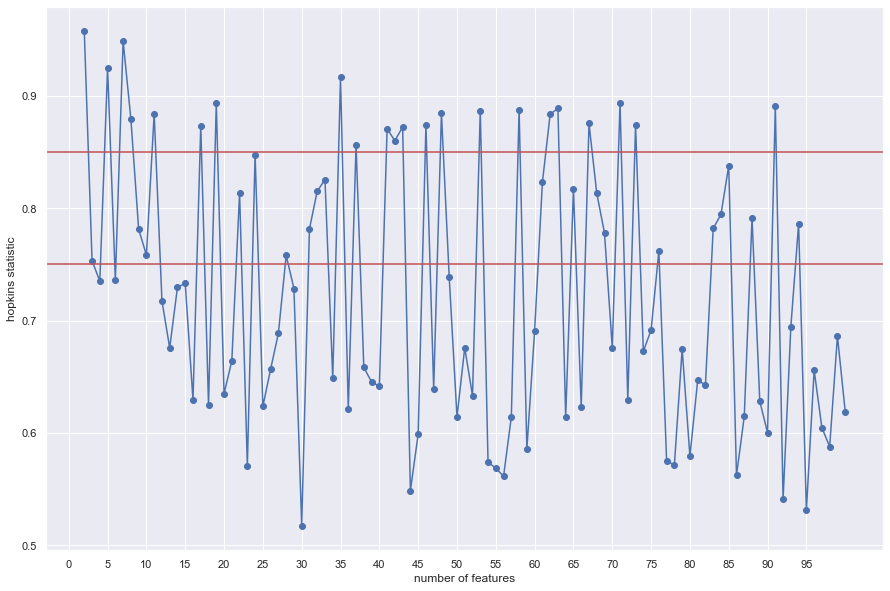

In [120]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from numpy.random import uniform
from sklearn.impute import SimpleImputer

# Clustering tendencies
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    #X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

#https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency
def hopkins_wrapper(dmf, k):
    selection = feature_metrics.sort_values(["score"], ascending=False).head(k).index
    selected_df= dmf.loc[:,dmf.columns.isin(selection)]

    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(selected_df)

    selected_df = imp_mean.transform(selected_df)

    selected_df = Normalizer(norm="l2").fit_transform(selected_df)
    return hopkins_statistic(selected_df)

print(hopkins_statistic(norm_data))

hopkins_stats = []
for k in range(99):
    hopkins_stats.append(hopkins_wrapper(dmf, k+2))

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel("number of features")
plt.ylabel("hopkins statistic")
plt.xticks(np.arange(0, 100, 5))
#ax = plt.axes()

plt.plot(np.arange(2, 101),hopkins_stats, marker='o')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.axhline(y=0.85, color='r', linestyle='-')

plt.show()

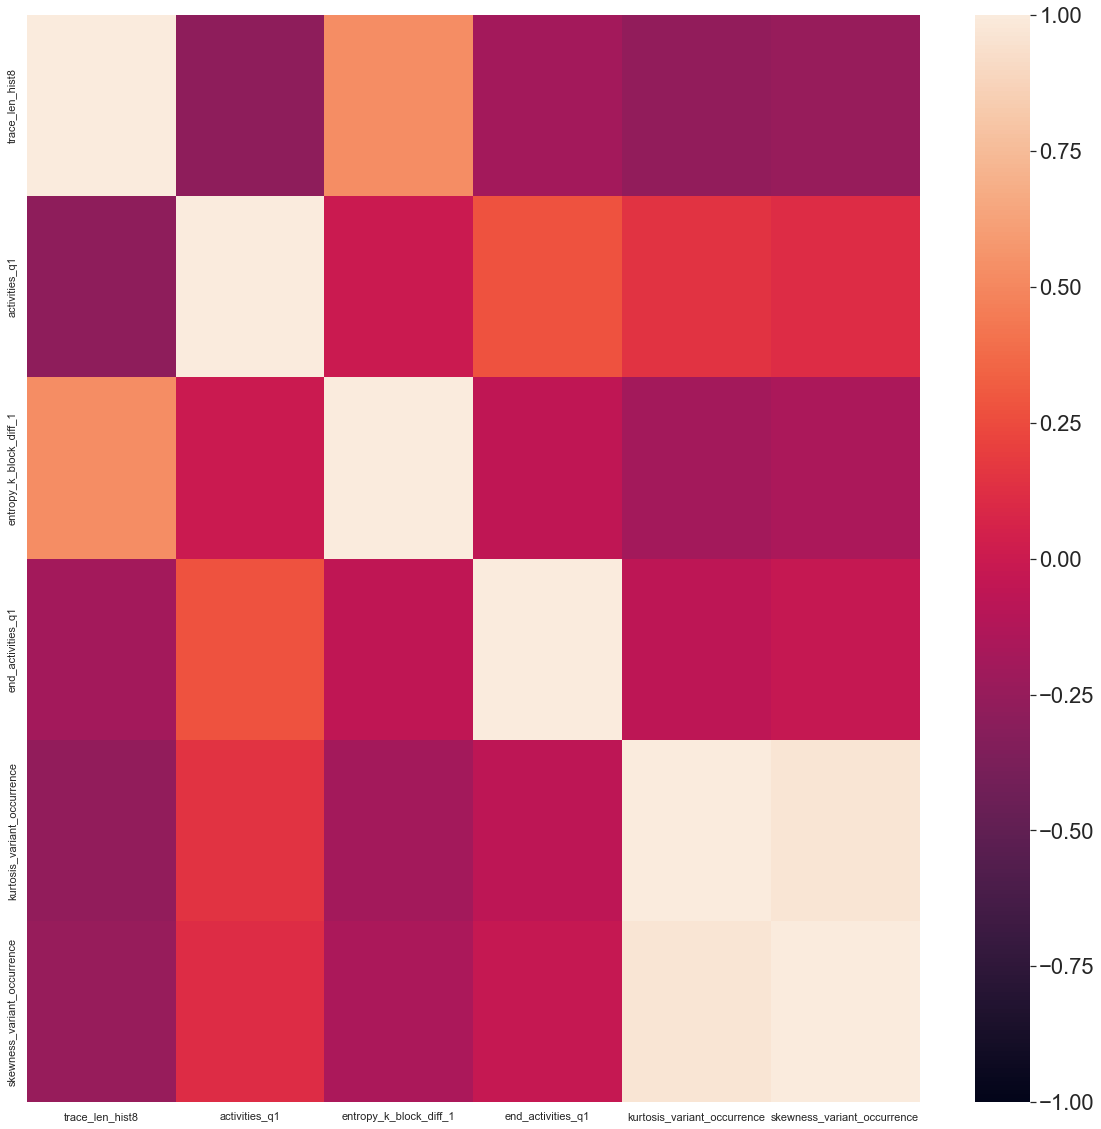

In [125]:
TOP_K = 6
selected_highest_score = feature_metrics.sort_values(["score"], ascending=False).head(TOP_K).index

feature_metrics.loc[selected_highest_score,:]
corr_sel_df = plot_miner_correlation(scaled_dmf[selected_highest_score])

In [126]:
## import numpy as np
from sklearn.impute import SimpleImputer
df= dmf.loc[:,dmf.columns.isin(selected_highest_score)]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)
imp_df = imp_mean.transform(df)
imp_df = pd.DataFrame(imp_df, columns = df.columns)
print("Before:", len(df.loc[:, df.isna().any()].columns), "columns in", len(df.loc[:, df.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

Before: 0 columns in 23 rows
After: 0


/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


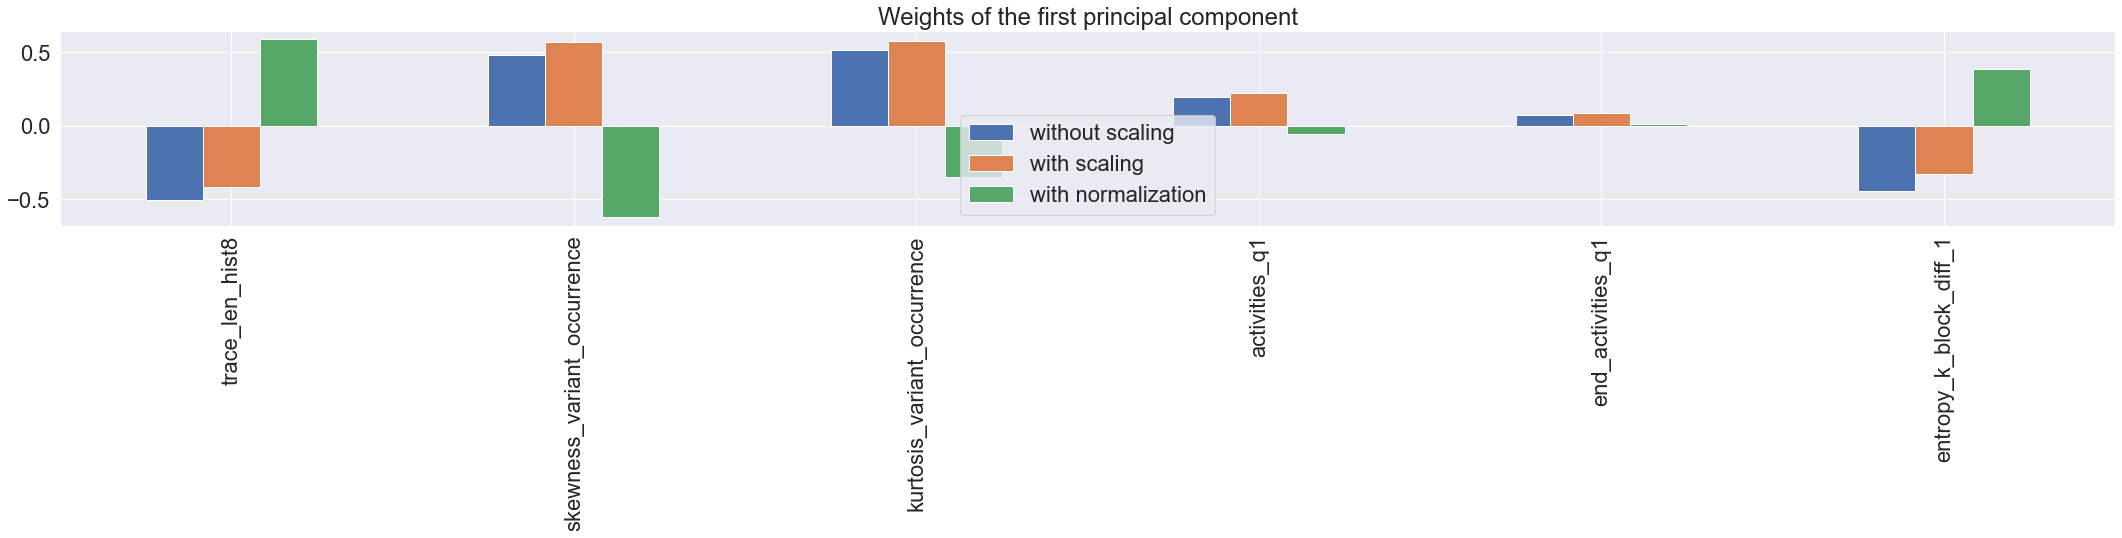

In [127]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = imp_df
scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)
minmaxscaled_X = minmaxscaler.fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(minmaxscaled_X)
minmax_pca =  PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_minmax_transformed = pca.transform(minmaxscaled_X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()



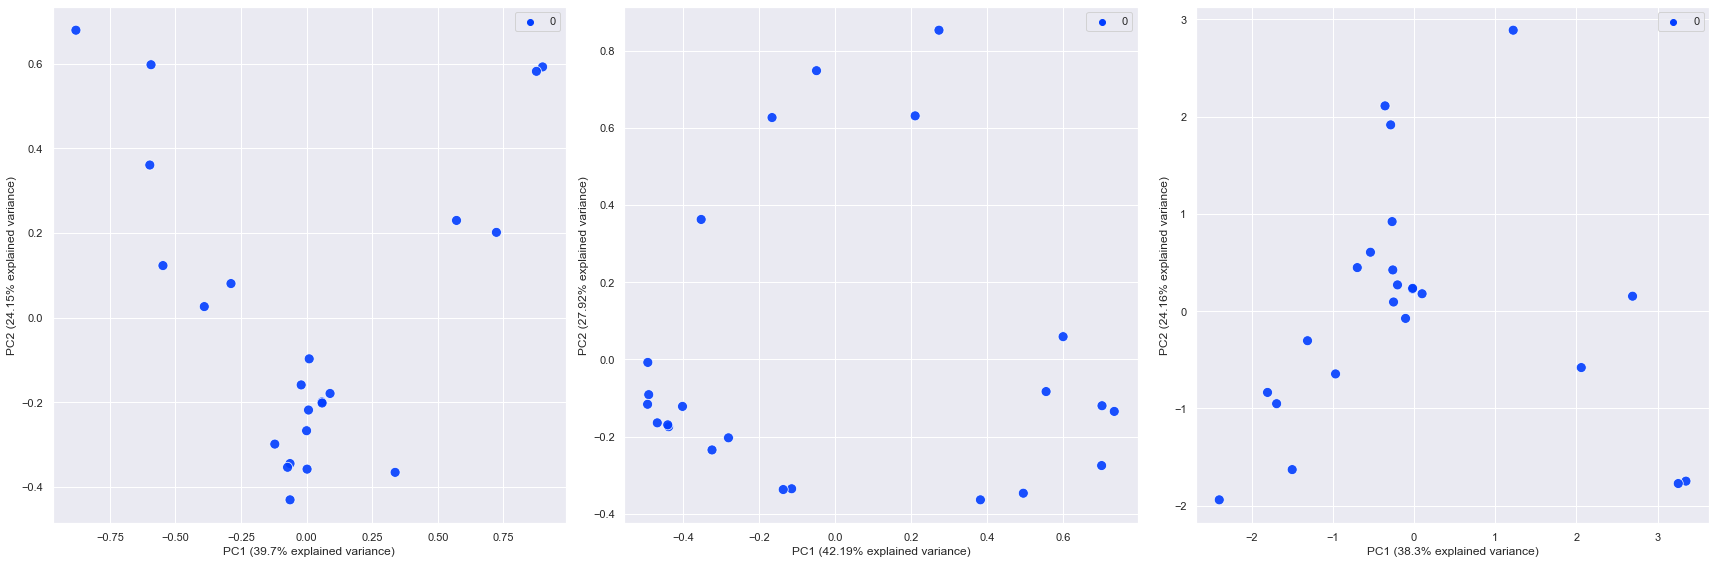

In [128]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

# Normalizer: By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. 
    # Unit norm with L2 means that if each element were squared and summed, the total would equal 1. 
    #Normalizer does transform all the features to values between -1 and 1. 
#norm_data = Normalizer(norm="l2").fit_transform(df.drop(["log"], axis=1))
norm_data = Normalizer(norm="l2").fit_transform(X)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
    #Unit variance means dividing all the values by the standard deviation.
scaler = StandardScaler()
sca_data = scaler.fit_transform(X)
#norm_data = Normalizer(norm="l2").fit_transform(norm_data)

sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24, 8))

#X_new = pca.fit_transform(X)
X_new = pca.fit_transform(minmaxscaled_X)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax1, data=df_pca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax1.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax1.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_norm = pca.fit_transform(norm_data)
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax2, data=df_pca_norm, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax2.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax2.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_sca = pca.fit_transform(sca_data)
df_pca_sca = pd.DataFrame(X_new_sca, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax3, data=df_pca_sca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax3.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax3.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()
# plt.show()
# plt.close()

#ratio number of activities and traces... 

# Clustering
## TODOs
- [x] Finetune choosing top k std, where correlation is not too high: 
    Multiplication maximizes std and disconnection at the same time
- [x] Include complexity features
- [ ] Investigate different clusterings

### Other thoughts
- Project clustering label to classification task to evaluate oversampling in MA
- Include sector labels/ related tasks from literature for classification

In [129]:
from sklearn.cluster import OPTICS, DBSCAN, KMeans, AgglomerativeClustering
import re

clustering_methods = ["OPTICS", "DBSCAN", "KMeans", "AgglomerativeClustering"]
distortion = []
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])


def parametrize_clustering(clustering_methods=["KMeans"]):
    result = []
    for method in clustering_methods:
        if method == "KMeans":
            for k in range(2, 10):
                result.append(f"KMeans(n_clusters={k}, random_state=5, n_init='auto')")
        elif method == "OPTICS" or method == "DBSCAN":
            for k in range(2, 4):
                result.append(f"{method}(min_samples={k})")
        elif method == "AgglomerativeClustering":
            for k in range(2, 10):
                result.append(f"AgglomerativeClustering(n_clusters={k})")     
    return result

def cluster_features(features, method="KMeans(n_clusters=4, random_state=5)"):    
    clustering = eval(f"{method}")
    clustering.fit(features)
    #clustering.inertia_
    params = re.findall(r'\d+', method)
    clus_name = clustering.__module__.rsplit(".",1)[1].replace("_","")+"_"+"_".join(params)
    df_pca_norm.insert(2, clus_name+"_label", clustering.labels_)
    

par_methods = parametrize_clustering(clustering_methods)
#print(par_methods)
for method in par_methods:
    cluster_features(norm_data, method)

df_pca_norm.head()

,PC1,PC2,agglomerative_9_label,agglomerative_8_label,agglomerative_7_label,agglomerative_6_label,agglomerative_5_label,agglomerative_4_label,agglomerative_3_label,agglomerative_2_label,...,kmeans_7_5_label,kmeans_6_5_label,kmeans_5_5_label,kmeans_4_5_label,kmeans_3_5_label,kmeans_2_5_label,dbscan_3_label,dbscan_2_label,optics_3_label,optics_2_label
0,0.600024,0.058897,1,1,4,4,4,1,0,1,...,3,3,3,3,0,0,0,0,0,0
1,-0.491109,-0.091375,2,5,5,5,0,2,2,0,...,1,1,1,1,1,1,1,1,3,4
2,0.702456,-0.120056,1,1,4,4,4,1,0,1,...,3,3,3,3,0,0,0,0,0,0
3,-0.114739,-0.335209,4,4,0,2,0,2,2,0,...,5,5,1,1,1,1,1,1,2,2
4,-0.494107,-0.116327,2,5,5,5,0,2,2,0,...,1,1,1,1,1,1,1,1,3,4


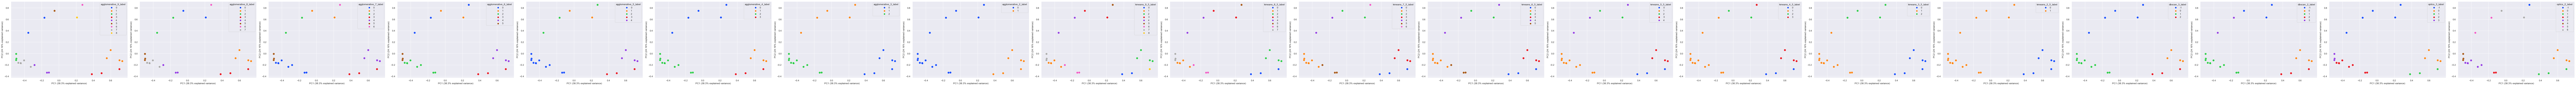

In [130]:
from sklearn.metrics import silhouette_score

cluster_cols = df_pca_norm.columns[2:]
fig, axes = plt.subplots( 1, len(df_pca_norm.columns)-2, figsize=(8*len(df_pca_norm.columns)-2,6)) 

for i, ax in enumerate(axes):
    #fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(
        ax=ax,
        data=df_pca_norm,
        x="PC1",
        y="PC2",
        hue=cluster_cols[i],
        palette="bright",
        alpha=0.9,
        s=100
    )
    ax.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
    ax.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()

#print(silhouette_score(norm_data, clustering.labels_))

In [131]:
from sklearn import metrics

clu_metrics = pd.DataFrame()
clu_metrics['method'] = [(x.rsplit("_label",1)[0]) for x in df_pca_norm.columns[2:]]
clu_metrics['calinski_harabasz'] = clu_metrics.apply(lambda x: 
                                                     metrics.calinski_harabasz_score(df_pca_norm, 
                                                                                     df_pca_norm[x['method']+'_label']),
                                                    axis=1)
clu_metrics['silhouette'] = clu_metrics.apply(lambda x: 
                                                     metrics.silhouette_score(df_pca_norm, 
                                                                                     df_pca_norm[x['method']+'_label']),
                                                    axis=1)
#davies_bouldin_score #Measures better separation between the clusters.
clu_metrics['davies_bouldin'] = clu_metrics.apply(lambda x: 
                                                     metrics.davies_bouldin_score(df_pca_norm, 
                                                                                     df_pca_norm[x['method']+'_label']),
                                                    axis=1)

clu_metrics['type'] = clu_metrics.apply(lambda x: x['method'].split("_",1)[0],
                                        axis=1)

clu_metrics['size'] = clu_metrics.apply(lambda x: int(x['method'].split("_")[1]),
                                        axis=1)
clu_metrics.head()

,method,calinski_harabasz,silhouette,davies_bouldin,type,size
0,agglomerative_9,45.903208,0.764623,0.361465,agglomerative,9
1,agglomerative_8,50.754332,0.823292,0.384660,agglomerative,8
2,agglomerative_7,10.824340,0.625600,0.648804,agglomerative,7
3,agglomerative_6,9.178705,0.575738,0.842760,agglomerative,6
4,agglomerative_5,5.827782,0.431105,1.052480,agglomerative,5


In [132]:
from sklearn.metrics.cluster import pair_confusion_matrix
pair_confusion_matrix(df_pca_norm['optics_2_label'],df_pca_norm['agglomerative_2_label'])

array([[224, 222],
       [  0,  60]])

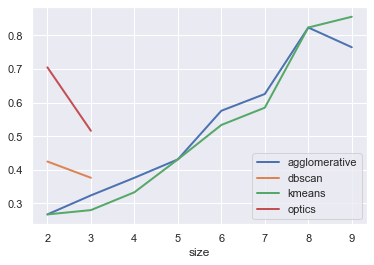

In [133]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

selected_metric = 'silhouette' #'silhouette'#'calinski_harabasz'#davies_bouldin_score
#fig = plt.figure(figsize=(15, 5))
plot_metrics = clu_metrics.set_index('size')
plot_metrics.groupby(['type'])[selected_metric].plot(legend=True, linewidth = 2)

#plt.title('Elbow curve')
plt.show()